In [1]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
import random
%matplotlib inline
from preprocess_module import fraud_preprocessor 
iptrain_df, iptest_df, optrain_df, optest_df, benetrain_df, benetest_df, label_train_df, label_test_df = fraud_preprocessor(1)

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
G.add_node(1)

In [ ]:
G.add_nodes_from([2, 3])

In [ ]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])


In [ ]:
H = nx.path_graph(10)

In [ ]:
G.add_nodes_from(H)

In [ ]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])

In [ ]:
G.add_edges_from(H.edges)

In [ ]:
G.clear()

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
iptrain_df.sample(5)

In [ ]:
iptrain_df['Provider'].unique().size

In [ ]:
iptrain_df['Provider'].size

In [ ]:
optrain_df['Provider'].unique().size

In [ ]:
optrain_df['Provider'].size

In [ ]:
optest_df['Provider'].size

In [ ]:
ipoptrain = pd.concat([iptrain_df,optrain_df])

In [ ]:
providerdf = ipoptrain[['Provider','AttendingPhysician']]

In [4]:
networkdf = label_train_df 
networkdf['Color'] = ['blue' if x==0 else 'red' for x in label_train_df.PotentialFraud]
networkdf['Label'] = label_train_df.index

networkdf.head(10)

,Provider,PotentialFraud,Color,Label
0,PRV51001,0,blue,0
1,PRV51003,1,red,1
2,PRV51004,0,blue,2
3,PRV51005,1,red,3
4,PRV51007,0,blue,4
5,PRV51008,0,blue,5
6,PRV51011,0,blue,6
7,PRV51012,0,blue,7
8,PRV51013,0,blue,8
9,PRV51014,0,blue,9


In [ ]:

#PNet.add_nodes_from(networkdf.Provider)
#pos = nx.spring_layout(G)



In [ ]:
#networkdf['Physicians']=''
#networkdf['Physicians'].astype('object')
#networkdf.at[0,'Physicians']=['a','b','c','d']
#networkdf
#for ind, provider in enumerate(list(networkdf.Provider)):
#    networkdf.at[ind,'Physicians'] = list(providerdf.loc[providerdf.Provider==provider,'AttendingPhysician'])
#list(providerdf.loc[providerdf.Provider==provider,'AttendingPhysician'])

In [3]:
physiciandf = pd.DataFrame({'Physician':providerdf.AttendingPhysician.unique()})

NameError: name 'providerdf' is not defined

In [ ]:
physiciandf['ConnectedPrvd'] = ''

In [ ]:
physiciandf['ConnectedPrvd'] = physiciandf['ConnectedPrvd'].astype('object')

In [ ]:
for ind, physician in enumerate(list(physiciandf.Physician)):
    physiciandf.at[ind, 'ConnectedPrvd'] = list(providerdf.loc[providerdf.AttendingPhysician==physician, 'Provider'])

In [ ]:
physiciandf.head(5)
physiciandf.to_csv('physiciandf',index=False)

In [123]:
import pandas as pd
physiciandf = pd.read_csv('physiciandf')
physiciandf['ConnectedPrvd'] = physiciandf.ConnectedPrvd.apply(lambda x: x[2:-2].split(r"', '"))
physiciandf = physiciandf.drop(135)
physiciandf.reset_index(drop=True, inplace=True)


import networkx as nx
PNet = nx.Graph()
maxlen = 1 
sharedphysician = ''
ldf = physiciandf.shape[0]

for ind in range(ldf):
    phys_set = set(physiciandf.ConnectedPrvd[ind])
    phys_list = list(phys_set)
    L_array = len(phys_list)
    if maxlen < L_array:
        maxlen = L_array
        sharedphysician = physiciandf.Physician[ind]
        
    if L_array<2:
        continue
    else:
        for i in range(L_array):
            for j in range(i+1,L_array):
                PNet.add_edge(phys_list[i],phys_list[j])
nodecolor = []
for node in nx.nodes(PNet):
    fraud = networkdf.loc[networkdf['Provider']==node,'PotentialFraud'].values[0]
    if (fraud==0): 
        nodecolor.append('blue')
    else:
        nodecolor.append('red')


In [124]:
maxlen

9

In [125]:
sharedphysician

'PHY342165'

In [121]:
physiciandf[134:137]

,Physician,ConnectedPrvd
134,PHY404243,[PRV56231]
135,PHY409070,"[PRV56253, PRV56253, PRV56253, PRV56253, PRV56..."
136,PHY415986,[PRV54657]


In [ ]:
plt.figure(figsize=(20,20))
nx.draw_spring(PNet,node_color=nodecolor,node_size=30)

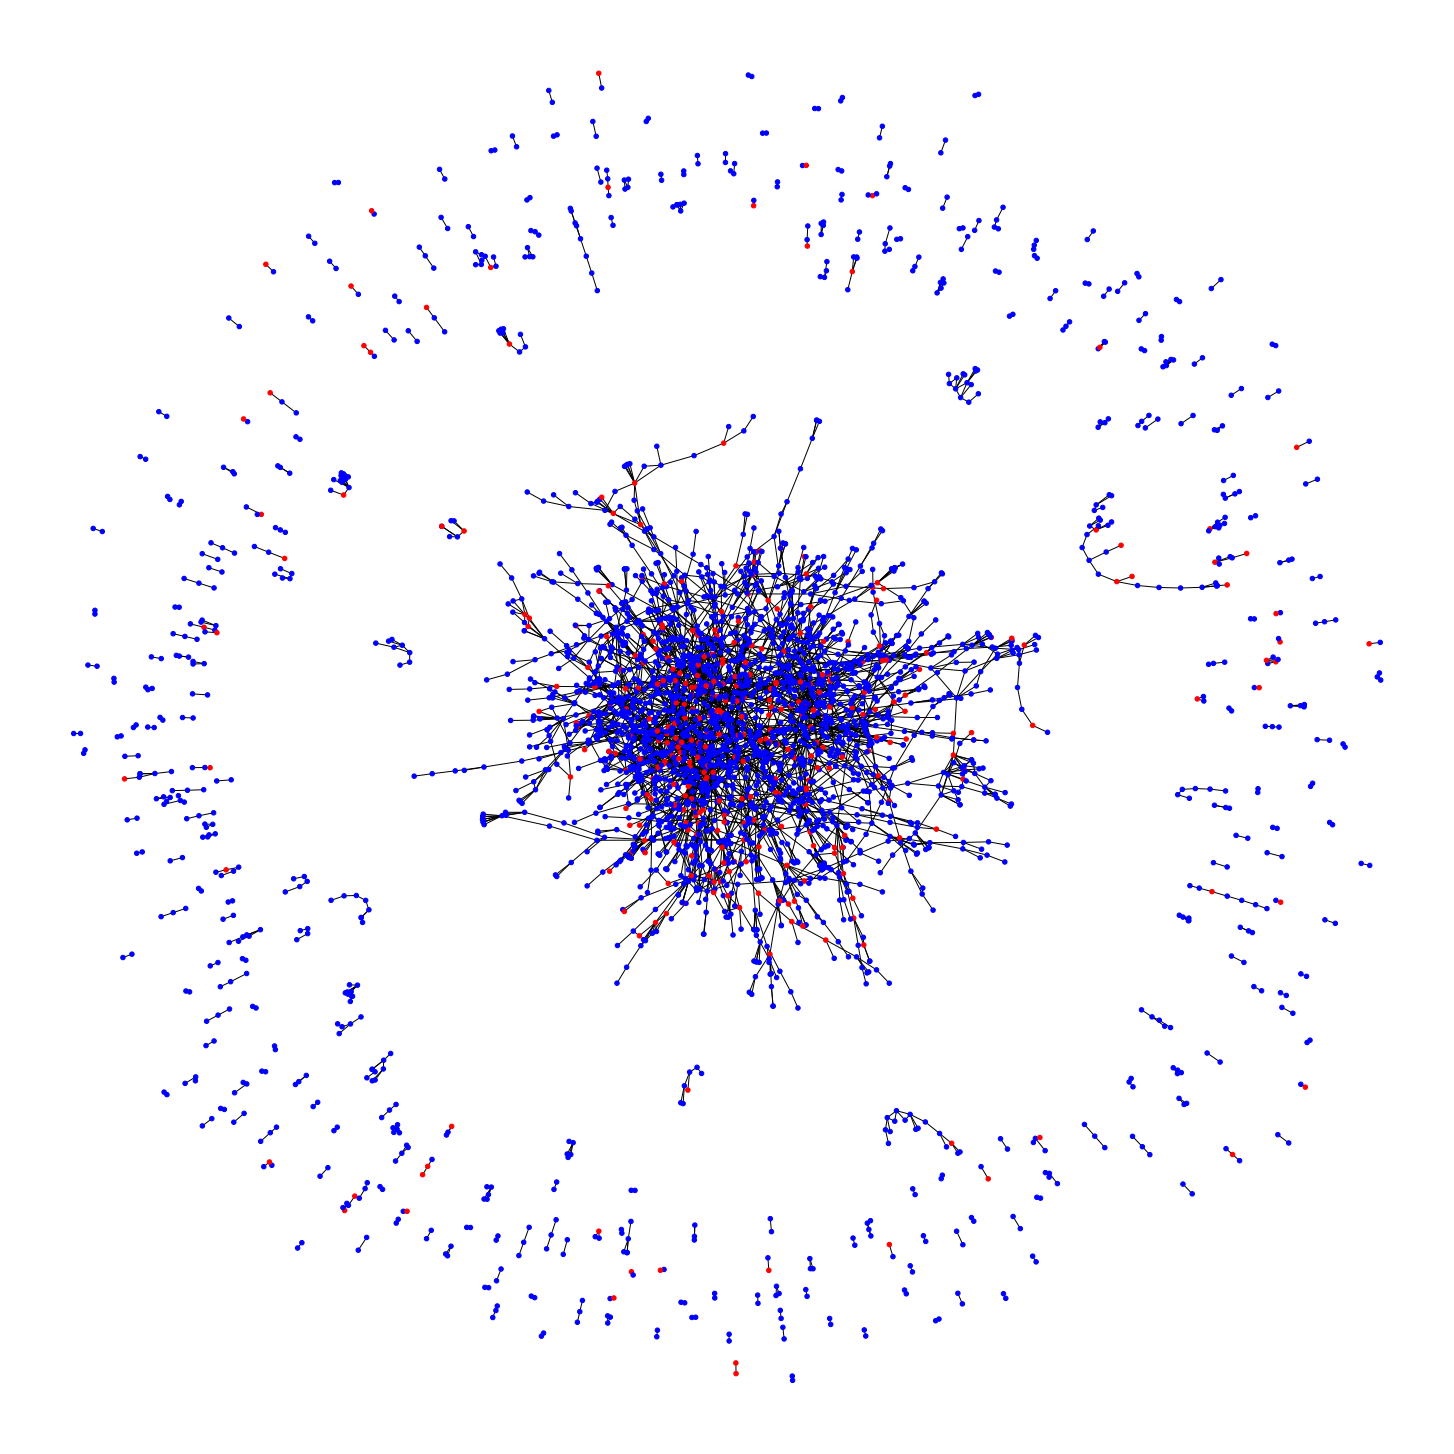

In [126]:
pos = nx.spectral_layout(PNet) 
plt.figure(figsize=(20,20))
nx.draw(PNet,node_size=20,node_color=nodecolor)

In [127]:
nx.degree(PNet)

DegreeView({'PRV51086': 3, 'PRV52405': 2, 'PRV51419': 2, 'PRV51710': 5, 'PRV56490': 2, 'PRV53374': 3, 'PRV57345': 3, 'PRV57341': 5, 'PRV56559': 1, 'PRV55396': 2, 'PRV51868': 6, 'PRV51891': 2, 'PRV52150': 6, 'PRV52120': 2, 'PRV52038': 3, 'PRV52130': 4, 'PRV54644': 4, 'PRV54653': 2, 'PRV54399': 6, 'PRV54384': 4, 'PRV52989': 2, 'PRV52985': 5, 'PRV55165': 11, 'PRV52617': 2, 'PRV52689': 1, 'PRV53614': 2, 'PRV53635': 2, 'PRV55687': 5, 'PRV55813': 1, 'PRV51456': 4, 'PRV51336': 1, 'PRV52152': 4, 'PRV52144': 3, 'PRV56773': 2, 'PRV57054': 1, 'PRV56668': 1, 'PRV56570': 2, 'PRV57514': 5, 'PRV57548': 7, 'PRV57549': 3, 'PRV55435': 2, 'PRV55510': 12, 'PRV53269': 7, 'PRV53242': 12, 'PRV56560': 2, 'PRV56647': 5, 'PRV54675': 1, 'PRV54680': 1, 'PRV57436': 4, 'PRV57406': 5, 'PRV57415': 4, 'PRV57523': 5, 'PRV57605': 2, 'PRV54772': 3, 'PRV54723': 5, 'PRV56896': 1, 'PRV57711': 1, 'PRV56734': 3, 'PRV56583': 1, 'PRV52119': 2, 'PRV52019': 17, 'PRV55755': 3, 'PRV55680': 1, 'PRV56574': 3, 'PRV56749': 6, 'PRV57697

In [213]:
connectednodes = []
for node in nx.nodes(PNet):
    if nx.degree(PNet,node)>10:
        connectednodes.append(node)
    else:
        continue
connectednodes

['PRV55165',
 'PRV55510',
 'PRV53242',
 'PRV52019',
 'PRV56469',
 'PRV55175',
 'PRV55169',
 'PRV54381',
 'PRV54910',
 'PRV56235',
 'PRV57209',
 'PRV54564',
 'PRV55230',
 'PRV56587',
 'PRV55192',
 'PRV54565',
 'PRV55215',
 'PRV55920',
 'PRV52332',
 'PRV51011',
 'PRV56803',
 'PRV55207',
 'PRV55238',
 'PRV55177',
 'PRV54924',
 'PRV55239',
 'PRV54888',
 'PRV53533',
 'PRV55248',
 'PRV56241',
 'PRV56328',
 'PRV54330',
 'PRV55181']

In [214]:
subnet = PNet.subgraph(connectednodes)
nx.nodes(subnet)
subnodecolor = []
for node in nx.nodes(subnet):
    fraud = networkdf.loc[networkdf['Provider']==node,'PotentialFraud'].values[0]
    if (fraud==0): 
        subnodecolor.append('blue')
    else:
        subnodecolor.append('red')

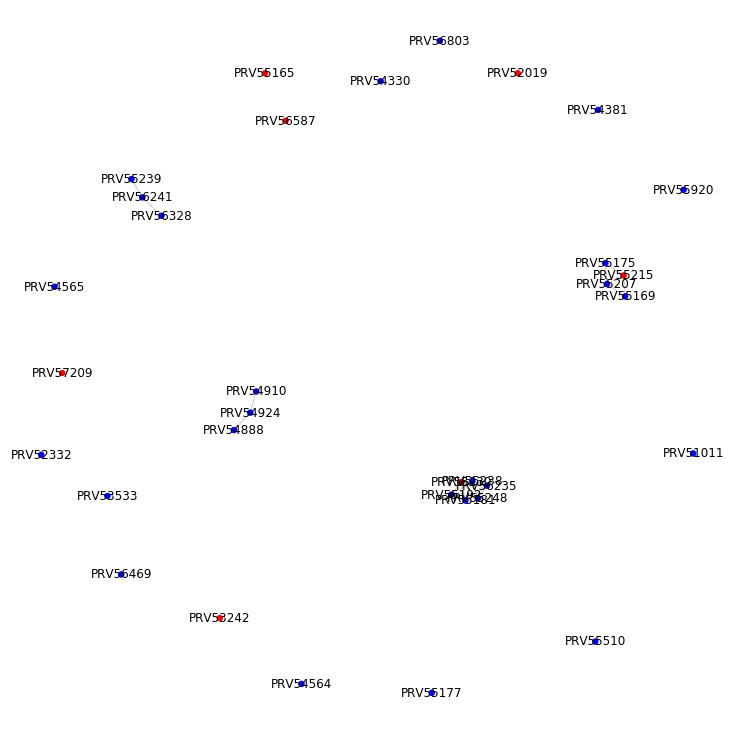

In [215]:
plt.figure(figsize=(10,10))
pos =  nx.spring_layout(subnet) 
nx.draw(subnet,pos,node_color=subnodecolor,node_size=30,width=0.2,with_labels=True)


In [201]:
nodearray = []
degreearray = []
for node in nx.nodes(PNet):
    nodearray.append(node)
    degreearray.append(nx.degree(PNet,node))

In [202]:
degreedf = pd.DataFrame(list(zip(nodearray,degreearray)), columns=['Provider','Degree'])

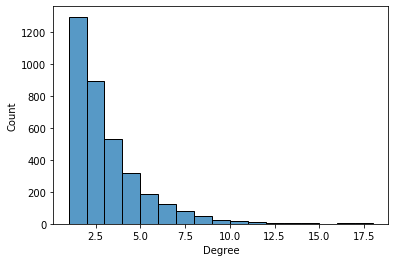

In [203]:

sns.histplot(degreedf.Degree,binwidth=1)


In [204]:
fraudnetworkdf=pd.merge(networkdf,degreedf,'inner',on='Provider')

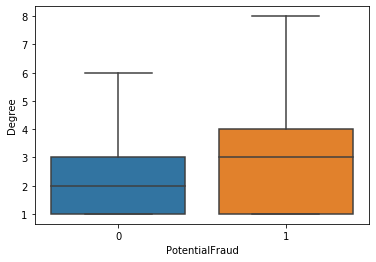

In [205]:
import seaborn as sns
sns.boxplot(x='PotentialFraud', y='Degree', data=fraudnetworkdf, showfliers=False)

In [206]:
# providers with at least one connection
fraudnetworkdf.groupby('PotentialFraud').count()

,Provider,Color,Label,Degree
PotentialFraud,,,,
0,3169,3169,3169,3169
1,385,385,385,385


In [207]:
# providers with more than 5 connections 
nodearray = []
degreearray = []
for node in nx.nodes(subnet):
    nodearray.append(node)
    degreearray.append(nx.degree(PNet,node))
degreedf = pd.DataFrame(list(zip(nodearray,degreearray)), columns=['Provider','Degree'])
fraudnetworkdf=pd.merge(networkdf,degreedf,'inner',on='Provider')
fraudnetworkdf.groupby('PotentialFraud').count()

,Provider,Color,Label,Degree
PotentialFraud,,,,
0,156,156,156,156
1,43,43,43,43


In [208]:
networkdf.groupby('PotentialFraud').count()

,Provider,Color,Label
PotentialFraud,,,
0,4904,4904,4904
1,506,506,506


In [60]:
506/(506+4904)

0.09353049907578559

In [209]:
43/(156+43)

0.21608040201005024

In [137]:
385/(3169+385)

0.10832864378165448

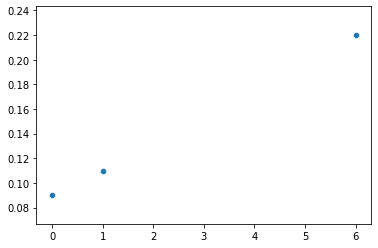

In [211]:
sns.scatterplot(x=[0, 1, 6], y=[0.09, 0.11, 0.22])

In [226]:
for node in PNet.neighbors('PRV54888'):
    print(node)

PRV55071
PRV55111
PRV55141
PRV54889
PRV54924
PRV54992
PRV55023
PRV55028
PRV55939
PRV55063
PRV54995


In [229]:

networkoutputdf = pd.merge(degreedf, networkdf, how='outer', on='Provider')[['Provider', 'Degree']]

In [231]:
networkoutputdf.fillna(0, inplace=True)

In [238]:
networkoutputdf = networkoutputdf.rename(columns={'Degree':"NetworkDegree"})

In [246]:
networkoutputdf.to_csv('networkdf.csv',index=False)

In [248]:
networkoutputdf

,Provider,NetworkDegree
0,PRV52019,17
1,PRV54888,11
2,PRV53979,8
3,PRV55175,14
4,PRV56251,10
...,...,...
5405,PRV57759,0
5406,PRV57760,0
5407,PRV57761,0
5408,PRV57762,0


In [243]:
from Feature_Engineering import feature_engineering

In [249]:
features = feature_engineering()

In [251]:
features.sample(20)

,Provider,Phys_Count,Patient_Count,Claim_Count,Service_Type,Both_Service,Inpatient,Outpatient,DuplicateClaims,Duplicate_Claims_Percent,...,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PotentialFraud,NetworkDegree
1038,PRV56142,29,51,82,Both_Service,1,0,0,58,0.71,...,145,136,132,105,100,138,136,157,No,0
969,PRV55821,6,135,270,Both_Service,1,0,0,150,0.56,...,506,462,422,343,334,449,468,516,Yes,0
930,PRV55281,1,95,247,Outpatient,0,0,1,114,0.46,...,448,424,396,324,303,453,405,440,No,0
1257,PRV57211,52,104,183,Both_Service,1,0,0,144,0.79,...,339,287,282,236,227,317,320,345,No,0
253,PRV51802,1,22,32,Outpatient,0,0,1,16,0.50,...,63,50,53,39,34,54,55,61,No,0
218,PRV51681,9,26,41,Both_Service,1,0,0,30,0.73,...,73,70,67,47,48,68,68,72,No,0
598,PRV53790,242,470,766,Both_Service,1,0,0,546,0.71,...,1375,1294,1200,1004,950,1288,1283,1473,Yes,0
9,PRV51148,61,263,494,Both_Service,1,0,0,328,0.66,...,899,840,758,634,600,817,826,936,Yes,7
784,PRV54914,14,220,553,Both_Service,1,0,0,302,0.55,...,1029,931,879,702,673,939,961,1061,No,0
1311,PRV57532,3,157,471,Outpatient,0,0,1,240,0.51,...,885,797,772,619,562,797,765,896,No,0


In [252]:
features.to_csv('Features.csv',index=False)